<a href="https://colab.research.google.com/github/zzickso/MachineLearning/blob/main/%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차원 입력 직선 모델

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#데이터 생성------------------------------------
np.random.seed(1)
X_min=4 # X의 하한(표시용)
X_max=30 # X의 상한(표시용)
X_n=16 # X의 상한(표시용)
X=5+25*np.random.rand(X_n)
Prm_c =[170,108,0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)
+4*np.random.randn(X_n)
np.savez('ch5_data.npz', X=X,X_min=X_min,X_max=X_max, X_n=X_n, T=T)

In [71]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [72]:
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [73]:
print(np.round(T,2))

[165.06 168.92 130.29 161.24 150.93 144.96 154.34 162.94 164.54 167.31
 165.12 168.71 155.71 169.51 135.35 168.61]


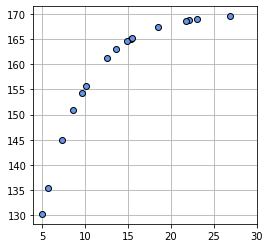

In [74]:
# X, T 그래프로 표시
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle="None",markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

##### 평균 제곱 오차와 매개 변수의 관계

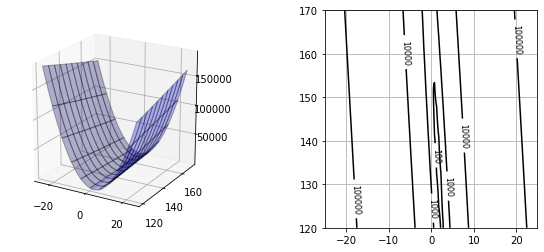

In [75]:
from mpl_toolkits.mplot3d import Axes3D

#평균 오차 함수---------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y- t)**2)
    return mse
 
#계산 ------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25,25]
w1_range = [120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0, xx1 = np.meshgrid(x0,x1)
J=np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))

#그래프 표시--------------------------------
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1, projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10, alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

In [77]:
# 평균 제곱 오차의 기울기 -------------------------
def dmse_line(x,t,w):
    y= w[0] *x +w[1]
    d_w0= 2*np.mean((y-t)*x)
    d_w1= 2*np.mean(y-t)
    return d_w0, d_w1

In [78]:
d_w =dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[5041.   301.8]


##### 매개 변수 구하기(경사 하강법)

반복 횟수13913
W=[1.601430,135.296986]
dMSE=[-0.005792,0.099970]
MSE=33.701973


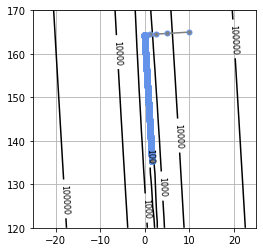

In [80]:
# 경사 하강법----------------------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수 
    eps = 0.1 # 반복을 종료 기울기의 절대값의 한계
    w_i= np.zeros([i_max, 2])
    w_i[0,:] = w_init
    for i in range(1, i_max):
        dmse= dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha * dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha * dmse[1]
        if max(np.absolute(dmse))<eps: #종료판정, np.absolute 는 절대값
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    return w0, w1, dmse ,w_i

# 메인------------------------------------------------------------
plt.figure(figsize=(4,4))
xn = 100 # 등고선 표시 해상도
w0_range = [-25,25]
w1_range = [120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0, xx1 = np.meshgrid(x0,x1)
J=np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호줄
W0, W1, dMSE, W_history = fit_line_num(X,T)

#결과보기
print('반복 횟수{0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-', color='gray',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

w0=1.601,w1=135.297
SD=5.805cm


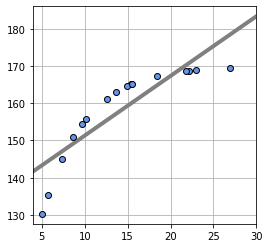

In [83]:
# 선표시-------------------------------------------
def show_line(w):
    xb=np.linspace(X_min, X_max, 100)
    y= w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5), linewidth=4)

# 메인--------------------------------------------
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print("w0={0:.3f},w1={1:.3f}".format(W0,W1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

w0=1.619,w1=134.993
SD=5.804cm


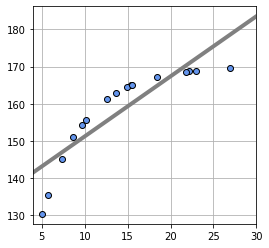

In [86]:
#해석해------------------------------------------------
def fit_line(x,t):
    mx=np.mean(x)
    mt=np.mean(t)
    mtx=np.mean(t*x)
    mxx=np.mean(x*x)
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt-w0*mx
    return np.array([w0,w1])

#메인-------------------------------------------------
W=fit_line(X,T)
print("w0={0:.3f},w1={1:.3f}".format(W[0],W[1]))
mse= mse_line(X,T,W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()